In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



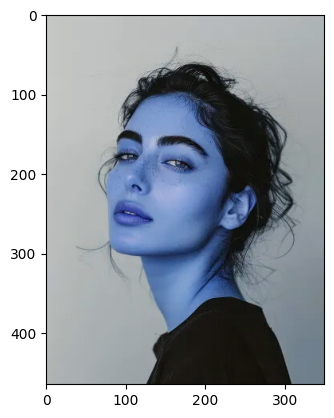

In [35]:
image = cv2.imread("images/image2.jpg")
plt.imshow(image)
plt.show()

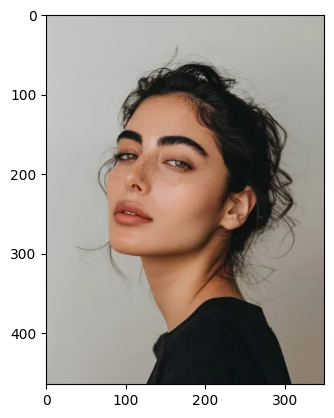

In [36]:
rgbScale = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgbScale)
plt.show()

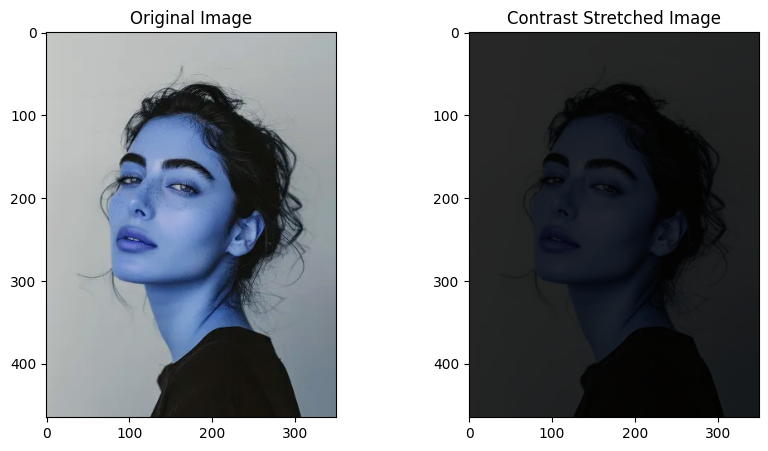

In [37]:
# Contrast Stretching

# Get the minimum and maximum pixel values
min_pixel = np.min(image)
max_pixel = np.max(image)

# Apply contrast stretching
scaled_image = np.uint8((image - min_pixel) * (0.2) + min_pixel)

# Display the original and contrast-stretched images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(scaled_image, cmap='gray')
plt.title("Contrast Stretched Image")
plt.show()

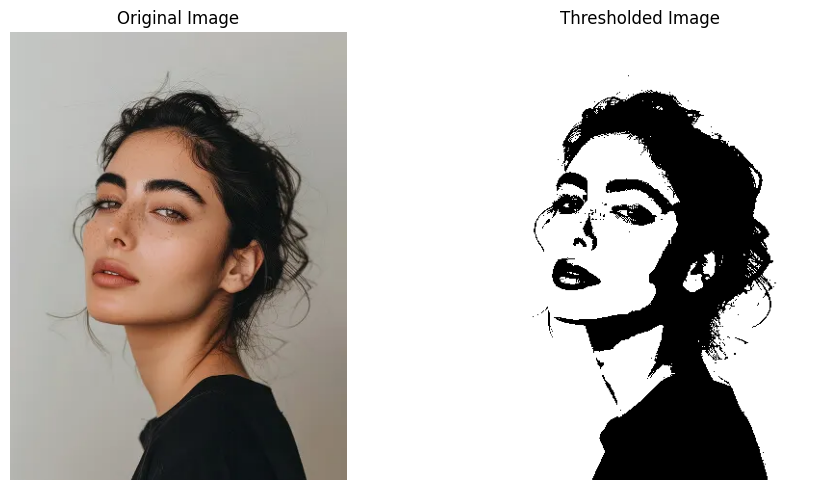

In [38]:
# Apply binary thresholding
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# cv2.THRESH_BINARY: Pixels greater than 127 become 255 (white), others become 0 (black)
_, thresholded_image = cv2.threshold(grayscale, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

# Show the original image (in RGB format)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display
plt.title("Original Image")
plt.axis('off')

# Show the thresholded image
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')  # Display in grayscale
plt.title("Thresholded Image")
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

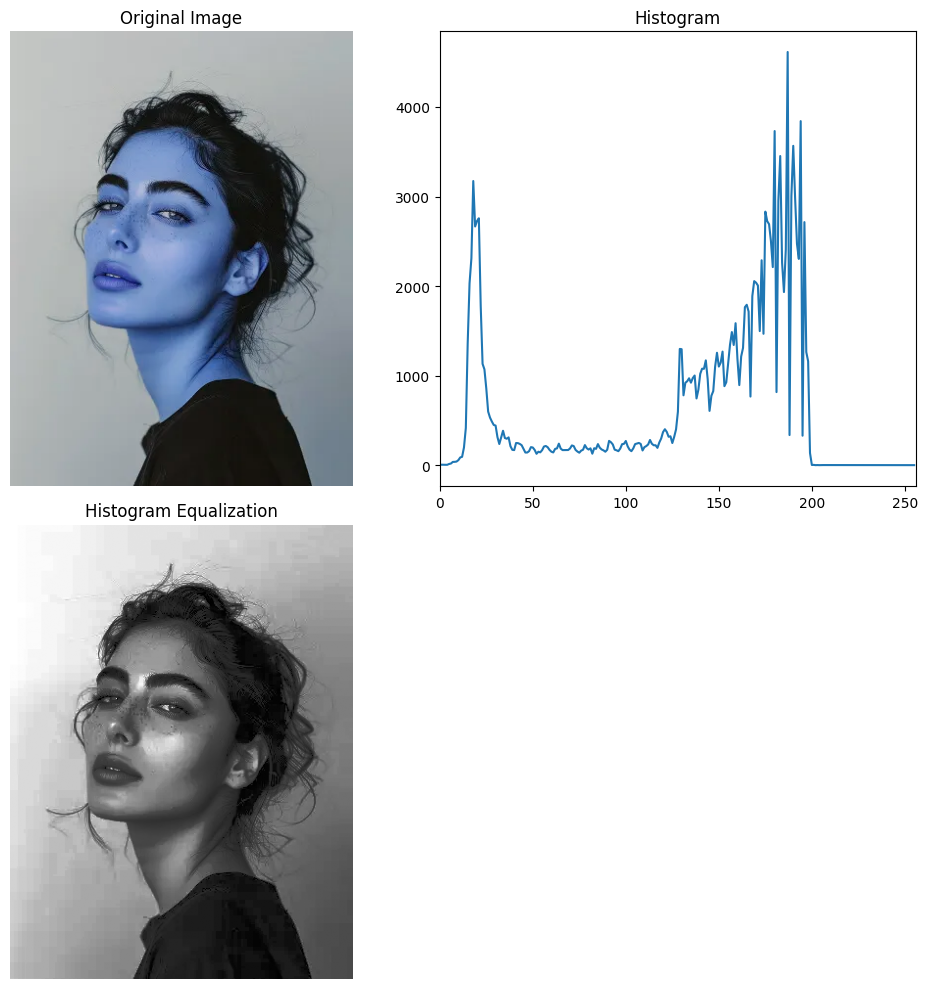

In [44]:
# Creating Histograms
hist = cv2.calcHist([grayscale], [0], None, [256], [0, 256])


# 2. Equalize Histogram
img_equalized = cv2.equalizeHist(grayscale)

# Visualize results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Original Histogram
plt.subplot(2, 3, 2)
plt.plot(hist)
plt.title('Histogram')
plt.xlim([0, 256])

# Equalized Image
plt.subplot(2, 3, 4)
plt.imshow(img_equalized, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')


plt.tight_layout()
plt.show()

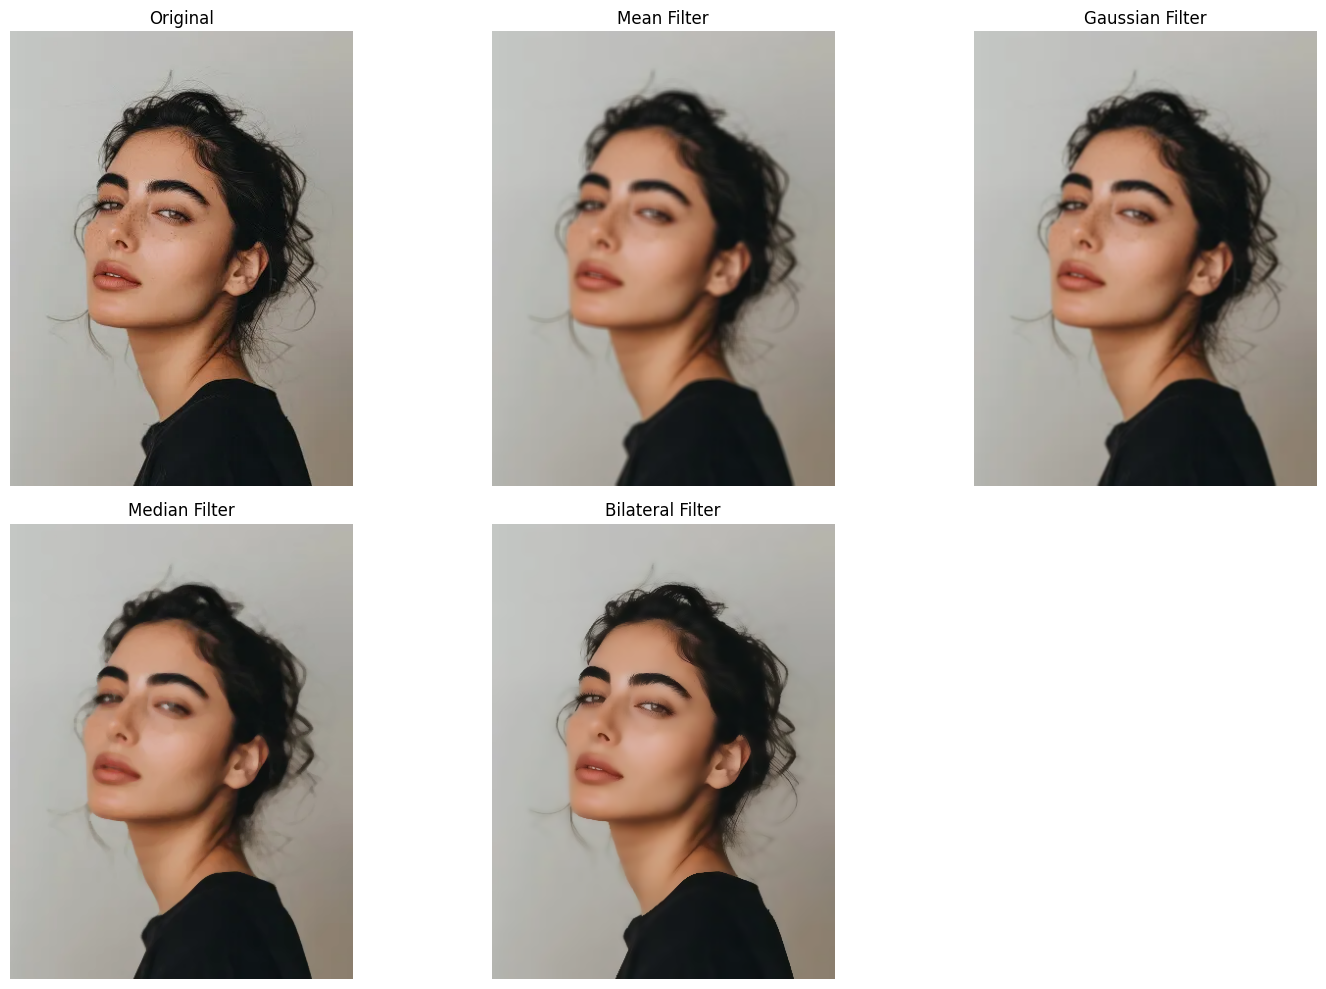

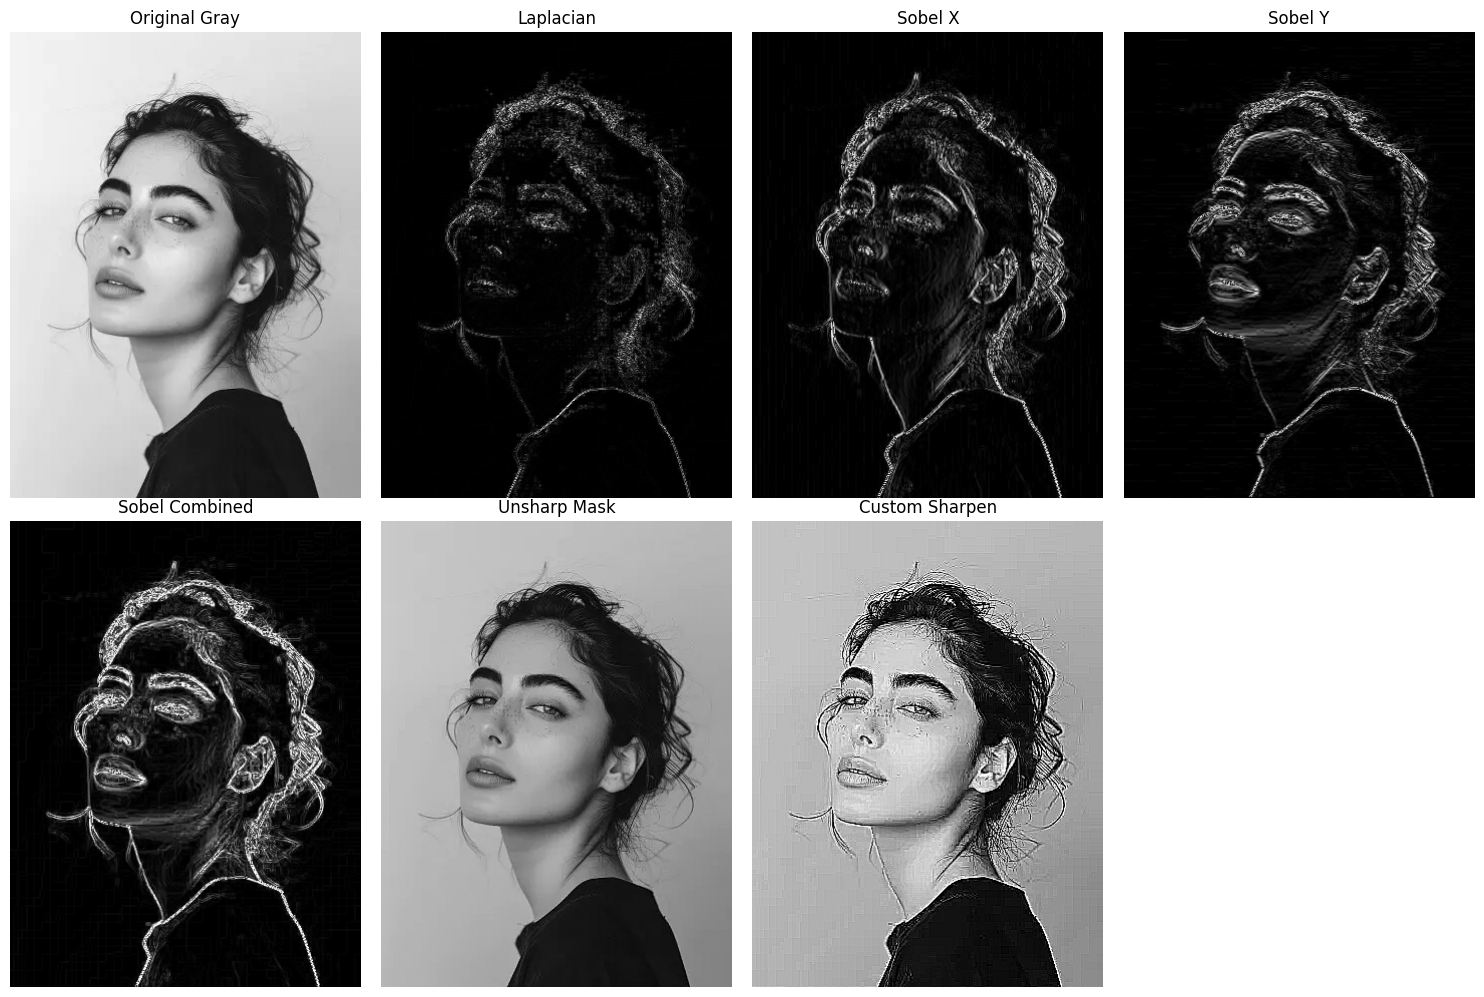

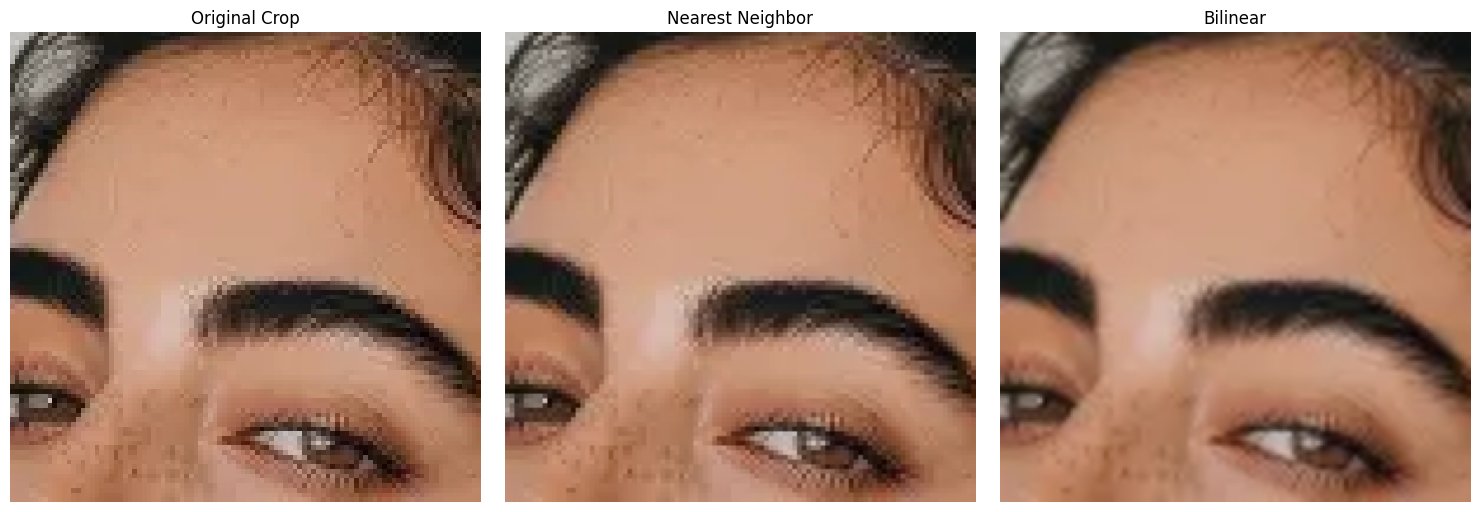

In [51]:


#  Smoothing Spatial Filters
#-----------------------------------------

# Mean/Average Filter (Box filter)
blur_mean = cv2.blur(rgbScale, (5, 5))  # 5x5 kernel

# Gaussian Filter
blur_gaussian = cv2.GaussianBlur(rgbScale, (5, 5), 0)  # 5x5 kernel, 0 = auto sigma

#  Median Filter (excellent for salt & pepper noise)
blur_median = cv2.medianBlur(rgbScale, 5)  # Kernel size 5x5

#  Bilateral Filter (edge-preserving smoothing)
blur_bilateral = cv2.bilateralFilter(rgbScale, 9, 75, 75)  # d, sigmaColor, sigmaSpace

# Sharpening Filters
#-----------------------------------------

#  Laplacian Filter for edge detection
laplacian = cv2.Laplacian(grayscale, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

#  Sobel Filter (gradient-based edge detection)
sobelx = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=3)  # x-direction
sobely = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=3)  # y-direction
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))
sobel_combined = cv2.bitwise_or(sobelx, sobely)

#  Unsharp Masking (sharpening technique)
gaussian = cv2.GaussianBlur(grayscale, (5, 5), 0)
unsharp_mask = cv2.addWeighted(grayscale, 1.5, gaussian, -0.5, 0)

# Custom Sharpening Kernel
kernel_sharpen = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
sharpen_custom = cv2.filter2D(rgbScale, -1, kernel_sharpen)

# Image Magnification
#-----------------------------------------

#Replication (Nearest Neighbor)
height, width = image.shape[:2]
enlarged_nn = cv2.resize(rgbScale, (width*2, height*2), interpolation=cv2.INTER_NEAREST)

#Bilinear Interpolation
enlarged_bilinear = cv2.resize(rgbScale, (width*2, height*2), interpolation=cv2.INTER_LINEAR)

# Bicubic Interpolation
enlarged_bicubic = cv2.resize(rgbScale, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

#  Lanczos Interpolation (high quality)
enlarged_lanczos = cv2.resize(rgbScale, (width*2, height*2), interpolation=cv2.INTER_LANCZOS4)

# Visualization


# Function to display images in a grid
def display_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        if len(img.shape) == 2:  # Grayscale
            plt.imshow(img, cmap='gray')
        else:  # Color
            plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display smoothing filters
smooth_images = [rgbScale, blur_mean, blur_gaussian, blur_median, blur_bilateral]
smooth_titles = ['Original', 'Mean Filter', 'Gaussian Filter', 'Median Filter', 'Bilateral Filter']
display_images(smooth_images, smooth_titles, 2, 3)

# Display sharpening filters
sharp_images = [grayscale, laplacian, sobelx, sobely, sobel_combined, unsharp_mask, sharpen_custom[:,:,0]]
sharp_titles = ['Original Gray', 'Laplacian', 'Sobel X', 'Sobel Y', 'Sobel Combined', 'Unsharp Mask', 'Custom Sharpen']
display_images(sharp_images, sharp_titles, 2, 4)

# Display magnification techniques
# First, take a small 100x100 region for better visualization of differences
crop = rgbScale[100:200, 100:200]
crop_nn = cv2.resize(crop, (200, 200), interpolation=cv2.INTER_NEAREST)
crop_bilinear = cv2.resize(crop, (200, 200), interpolation=cv2.INTER_LINEAR)


mag_images = [crop, crop_nn, crop_bilinear]
mag_titles = ['Original Crop', 'Nearest Neighbor', 'Bilinear']
display_images(mag_images, mag_titles, 2, 3)